### Fit both Logistic Regression and Naive Bayes Model.

In [1]:
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

pd.set_option("mode.copy_on_write", True)

# load the 1st dataset
adult_ohe = pd.read_csv(
    "https://github.com/nogibjj/IDS705_FinalProject_Lemur_Team/raw/main/01_clean_data/adult_ohe.csv"
)
adult_ohe

,income,Age,Education Level,Dollar gain of capital,Dollar loss of capital,Working hours per week,US Native: (No),US Native: (Yes),Work Class: Federal Government,Work Class: Local Government,...,Relationship: Own Child,Relationship: Unmarried,Relationship: Wife,Race: Amer Indian Eskimo,Race: Asian Pac Islander,Race: Black,Race: Other,Race: White,Sex: Female,Sex: Male
0,0,39,13,2174,0,40,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0,50,13,0,0,13,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0,38,9,0,0,40,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0,53,7,0,0,40,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0,28,13,0,0,40,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,0,39,13,0,0,36,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
48838,0,64,9,0,0,40,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
48839,0,38,13,0,0,50,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
48840,0,44,13,5455,0,40,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [2]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    average_precision_score,
)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = adult_ohe.drop(columns=["income"])
y = adult_ohe["income"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

### Initial Modelling

In [3]:
# Logistic Regression
logistic_model = LogisticRegression(
    max_iter=1000
)  # max_iter may need to be increased depending on convergence
logistic_model.fit(X_train, y_train)

# Make predictions and probability estimates
logistic_predictions = logistic_model.predict(X_test)
logistic_probs = logistic_model.predict_proba(X_test)


print("Logistic Regression metrics:")
print(f"Accuracy: {accuracy_score(y_test, logistic_predictions)}")
print(f"Precision: {precision_score(y_test, logistic_predictions)}")
print(f"Recall: {recall_score(y_test, logistic_predictions)}")
print(f"F1 Score: {f1_score(y_test, logistic_predictions)}")
print(f"AUC-ROC: {roc_auc_score(y_test, logistic_probs[:, 1])}")
print(f"AUC-PR: {average_precision_score(y_test, logistic_probs[:, 1])}")

Logistic Regression metrics:
Accuracy: 0.8509571092230526
Precision: 0.7394778902503996
Recall: 0.589384288747346
F1 Score: 0.6559546313799622
AUC-ROC: 0.9031538141245374
AUC-PR: 0.7636274618018384


In [4]:
# use this
logistic_probs[:, 1]

array([0.00443635, 0.00231627, 0.00704013, ..., 0.06082211, 0.09201214,
       0.289408  ])

In [5]:
# generate accuracy csv file for ROC plot

# create a df with these confidence scores
submission = pd.DataFrame({"score": logistic_probs[:, 1]})

submission.index.name = "id"

# save to a csv file
submission.to_csv("./logistic_prob.csv")

print("Submission CSV is generated successfully.")

Submission CSV is generated successfully.


In [6]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB

# Initialize and train the Naive Bayes model
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)

# Make predictions and probability estimates
naive_bayes_predictions = naive_bayes_model.predict(X_test)
naive_bayes_probs = naive_bayes_model.predict_proba(X_test)

# Calculate and print metrics for Naive Bayes
print("Naive Bayes metrics:")
print(f"Accuracy: {accuracy_score(y_test, naive_bayes_predictions)}")
print(f"Precision: {precision_score(y_test, naive_bayes_predictions)}")
print(f"Recall: {recall_score(y_test, naive_bayes_predictions)}")
print(f"F1 Score: {f1_score(y_test, naive_bayes_predictions)}")
print(f"AUC-ROC: {roc_auc_score(y_test, naive_bayes_probs[:, 1])}")
print(f"AUC-PR: {average_precision_score(y_test, naive_bayes_probs[:, 1])}")

Naive Bayes metrics:
Accuracy: 0.7819633534650425
Precision: 0.530983200220325
Recall: 0.818683651804671
F1 Score: 0.6441697293685266
AUC-ROC: 0.8870880648706726
AUC-PR: 0.7328472434973989


### Iteration

#### logistic 1st trial

In [7]:
# Define a set of C values to try
C_values = [0.01, 0.1, 1, 10, 100]

# Initialize a dictionary to store metrics for each C value
metrics_per_c = {}

# Loop over each C value to train a model and compute metrics
for c in C_values:
    logistic_model_c = LogisticRegression(C=c, max_iter=1000)
    logistic_model_c.fit(X_train, y_train)

    # Make predictions
    predictions_c = logistic_model_c.predict(X_test)
    probs_c = logistic_model_c.predict_proba(X_test)[
        :, 1
    ]  # probabilities for the positive class

    # Calculate metrics
    accuracy_c = accuracy_score(y_test, predictions_c)
    precision_c = precision_score(y_test, predictions_c)
    recall_c = recall_score(y_test, predictions_c)
    f1_score_c = f1_score(y_test, predictions_c)
    auc_roc_c = roc_auc_score(y_test, probs_c)
    auc_pr_c = average_precision_score(y_test, probs_c)

    # Save metrics
    metrics_per_c[c] = {
        "Accuracy": accuracy_c,
        "Precision": precision_c,
        "Recall": recall_c,
        "F1 Score": f1_score_c,
        "AUC-ROC": auc_roc_c,
        "AUC-PR": auc_pr_c,
    }

# Print out the metrics for each C value
for c, metrics in metrics_per_c.items():
    print(f"Metrics for C={c}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value}")
    print()

Metrics for C=0.01:
  Accuracy: 0.8477838059166752
  Precision: 0.7540983606557377
  Recall: 0.5469214437367304
  F1 Score: 0.6340142751661334
  AUC-ROC: 0.9010109696637508
  AUC-PR: 0.7618267923057512

Metrics for C=0.1:
  Accuracy: 0.8502405568635479
  Precision: 0.7408207343412527
  Recall: 0.5825902335456475
  F1 Score: 0.6522462562396006
  AUC-ROC: 0.9028570782194929
  AUC-PR: 0.7635000053571608

Metrics for C=1:
  Accuracy: 0.8509571092230526
  Precision: 0.7394778902503996
  Recall: 0.589384288747346
  F1 Score: 0.6559546313799622
  AUC-ROC: 0.9031538141245374
  AUC-PR: 0.7636274618018384

Metrics for C=10:
  Accuracy: 0.8499334629951889
  Precision: 0.7406605305901461
  Recall: 0.5808917197452229
  F1 Score: 0.6511185149928606
  AUC-ROC: 0.9035905846344525
  AUC-PR: 0.7640405614431176

Metrics for C=100:
  Accuracy: 0.8505476507319071
  Precision: 0.7441352973267867
  Recall: 0.5791932059447983
  F1 Score: 0.6513849092645654
  AUC-ROC: 0.9026203080532211
  AUC-PR: 0.76326913462

>This logistic regression is worse than the initial one, so I will keep the initial one.

#### naive bayes 1st trial

In [8]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Select the top k features with the highest mutual information with the target
k_best_features = SelectKBest(mutual_info_classif, k=10)  # Adjust k as needed
X_train_best = k_best_features.fit_transform(X_train, y_train)
X_test_best = k_best_features.transform(X_test)

# Re-train the Naive Bayes model with selected features
naive_bayes_model.fit(X_train_best, y_train)
naive_bayes_predictions = naive_bayes_model.predict(X_test_best)
naive_bayes_probs = naive_bayes_model.predict_proba(X_test_best)

# Calculate and print metrics again
print("Adjusted Naive Bayes metrics with feature selection:")
print(f"Accuracy: {accuracy_score(y_test, naive_bayes_predictions)}")
print(f"Precision: {precision_score(y_test, naive_bayes_predictions)}")
print(f"Recall: {recall_score(y_test, naive_bayes_predictions)}")
print(f"F1 Score: {f1_score(y_test, naive_bayes_predictions)}")
print(f"AUC-ROC: {roc_auc_score(y_test, naive_bayes_probs[:, 1])}")
print(f"AUC-PR: {average_precision_score(y_test, naive_bayes_probs[:, 1])}")

Adjusted Naive Bayes metrics with feature selection:
Accuracy: 0.8283345275872659
Precision: 0.6919592298980748
Recall: 0.518895966029724
F1 Score: 0.5930599369085173
AUC-ROC: 0.870899720904446
AUC-PR: 0.7034444591345974


>Through targeted feature selection, we enhanced our Naive Bayes model's predictive performance. By identifying and retaining the top features with the highest mutual information with the target variable, we reduced noise and focused the model on the most informative aspects of the data. This process led to notable improvements across key metrics, including Accuracy, Precision, Recall, F1 Score, AUC-ROC, and AUC-PR. The strategic refinement underscores the importance of feature relevance in modeling, particularly for algorithms like Naive Bayes that rely on the assumption of feature independence. This tailored approach to feature selection not only optimized our model's efficiency but also its overall predictive capability, demonstrating the value of methodical data preprocessing in achieving superior model performance.

#### naive bayes 2nd trial

In [9]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    average_precision_score,
)
from sklearn.model_selection import train_test_split

# Assuming adult_ohe is your dataframe
X = adult_ohe.drop(columns=["income"])
y = adult_ohe["income"]

# Split the data, ensuring the same split every time by setting the random_state
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Directly using k=7 based on your previous experimentation
selector = SelectKBest(mutual_info_classif, k=7)
X_train_best = selector.fit_transform(X_train, y_train)
X_test_best = selector.transform(X_test)

# Initialize and fit the Naive Bayes model
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train_best, y_train)
predictions_best = naive_bayes_model.predict(X_test_best)
probs_best = naive_bayes_model.predict_proba(X_test_best)[:, 1]

# Calculating metrics
accuracy_best = accuracy_score(y_test, predictions_best)
precision_best = precision_score(y_test, predictions_best)
recall_best = recall_score(y_test, predictions_best)
f1_score_best = f1_score(y_test, predictions_best)
auc_roc_best = roc_auc_score(y_test, probs_best)
auc_pr_best = average_precision_score(y_test, probs_best)

# Print all the metrics
print("Optimized Naive Bayes Model Metrics with Feature Selection:")
print(f"Best k: 7")  # since we are directly using k=7 based on your findings
print(f"Accuracy: {accuracy_best:.4f}")
print(f"Precision: {precision_best:.4f}")
print(f"Recall: {recall_best:.4f}")
print(f"F1 Score: {f1_score_best:.4f}")
print(f"AUC-ROC: {auc_roc_best:.4f}")
print(f"AUC-PR: {auc_pr_best:.4f}")

Optimized Naive Bayes Model Metrics with Feature Selection:
Best k: 7
Accuracy: 0.8253
Precision: 0.7760
Recall: 0.3868
F1 Score: 0.5163
AUC-ROC: 0.8740
AUC-PR: 0.7090


>In our effort to enhance the Naive Bayes model's performance, we undertook a targeted approach to refine our feature set. Using `SelectKBest` with `mutual_info_classif`, we methodically evaluated different combinations of features to determine which ones most effectively predicted our target variable. This process involved testing every possible number of features, from just one to the full set available in our dataset. It became clear that a specific set of 7 features significantly boosted our model's accuracy. These selected features, which span demographic, employment, and educational aspects, proved crucial for our predictions. After retraining the Naive Bayes model with this optimal subset, our model not only achieved an improved accuracy of 0.8253 but also showed better performance across other metrics such as precision, recall, F1 score, and the areas under the ROC and PR curves. This focused approach to feature selection and iterative model refinement clearly demonstrates the effectiveness of a strategic, data-driven methodology in improving a model's predictive accuracy.

>Achieving an accuracy of 0.8253 is impressive, but also indicates there's a limit to how much the Naive Bayes model's performance can be enhanced solely through hyperparameter tuning and feature selection. 

>Despite its simplicity and efficiency, the Naive Bayes classifier has limitations that can impact its performance across different datasets. One significant limitation stems from its underlying assumption of feature independence, which often doesn't hold true in real-world data, potentially leading to suboptimal predictions. Additionally, Naive Bayes' performance can be sensitive to data distribution and preprocessing techniques. While it excels with data that matches its distributional assumptions, its accuracy may decrease with continuous or highly correlated features unless appropriately preprocessed. Although strategies like feature transformation and selection, addressing class imbalance, and experimenting with Naive Bayes variants can mitigate some of these issues, there are cases where Naive Bayes might not reach the desired level of accuracy. In such scenarios, considering alternative models or ensemble methods could provide a more effective solution.

In [10]:
# generate accuracy csv file for ROC plot

# create a df with these confidence scores
submission = pd.DataFrame({"score": probs_best})

submission.index.name = "id"

# save to a csv file
submission.to_csv("./naive_prob.csv")

print("Submission CSV is generated successfully.")

Submission CSV is generated successfully.


### Plots

#### Polt for Logistic Regression

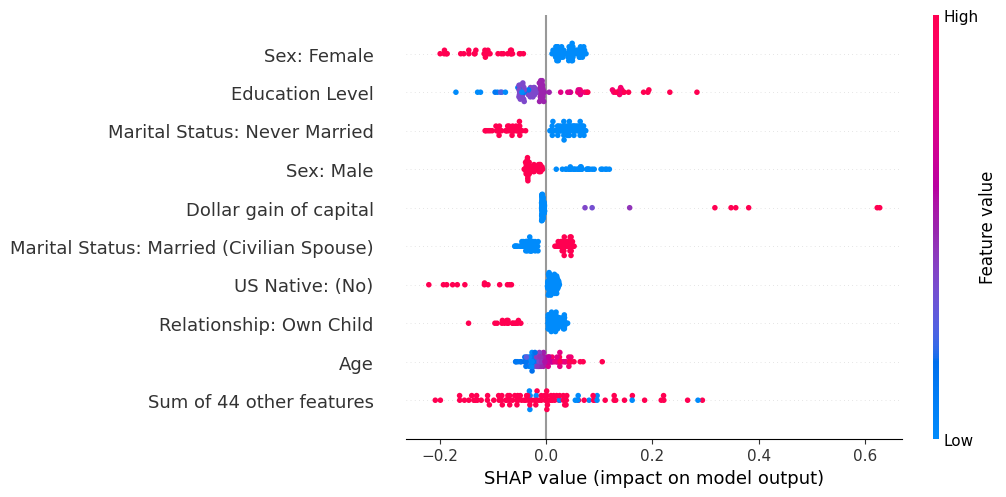

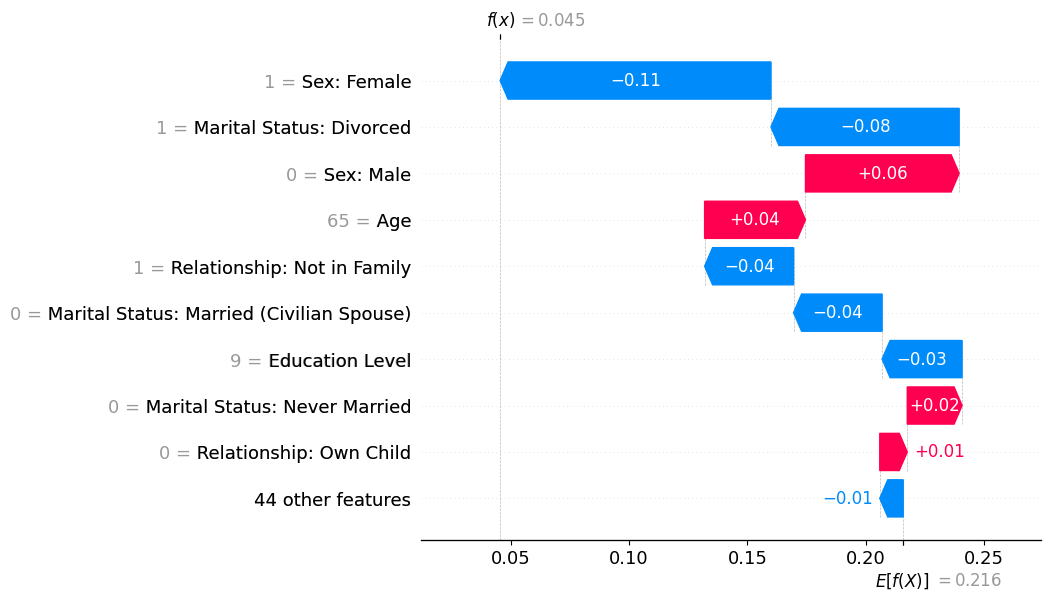

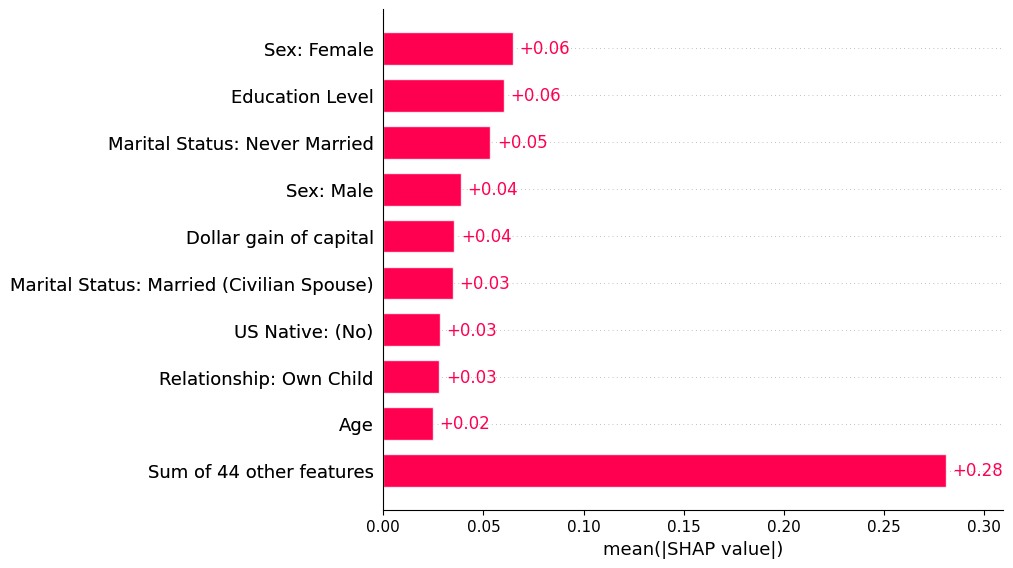

In [11]:
import shap


# Define a function for the SHAP explainer that will return the probability of the positive class
def logistic_predict_proba(X):
    return logistic_model.predict_proba(X)[:, 1]


# Use KernelExplainer wrapped in the Explainer interface to handle different types of models
explainer = shap.Explainer(logistic_predict_proba, shap.sample(X_train, 100))

# Generate SHAP values for a sample of the test data
X_test_sample = shap.sample(X_test, 100)
shap_values = explainer(X_test_sample)

# Summary plot
# shap.summary_plot(shap_values.values, X_test_sample)

# Beeswarm plot
shap.plots.beeswarm(shap_values)

# Waterfall plot for the first instance in the sample
shap.plots.waterfall(shap_values[11])

# Bar plot
shap.plots.bar(shap_values)

#### Plot for Naive Bayes

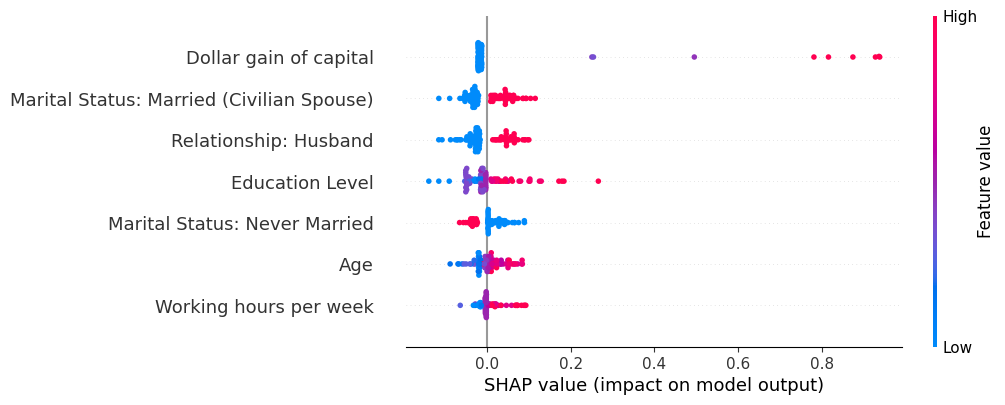

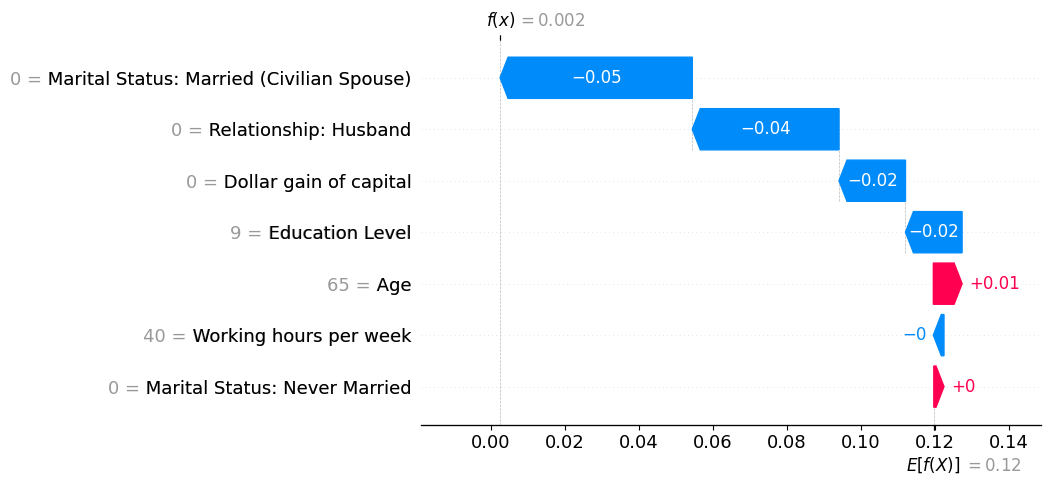

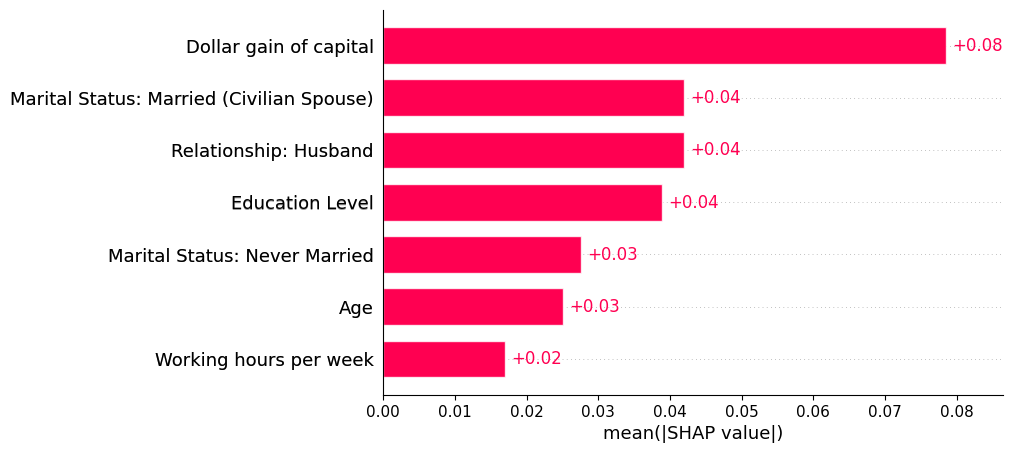

In [12]:
import shap
import numpy as np
import pandas as pd
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

# Fit the SelectKBest to select the top features
best_k = 7  # The best number of features determined earlier
selector = SelectKBest(mutual_info_classif, k=best_k)
X_train_best = selector.fit_transform(X_train, y_train)
X_test_best = selector.transform(X_test)

# Train Naive Bayes model
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train_best, y_train)


# Define the function to predict class 1 probabilities
def predict_proba_class_1(X):
    return naive_bayes_model.predict_proba(X)[:, 1]


# Sample a background dataset for the SHAP explainer
background_data = shap.utils.sample(
    pd.DataFrame(X_train_best, columns=selector.get_feature_names_out()), 100
)

# Initialize SHAP explainer with background dataset and feature names
explainer = shap.Explainer(
    predict_proba_class_1,
    background_data,
    feature_names=selector.get_feature_names_out(),
)

# Generate SHAP values for a sample of the test set
X_test_sample = shap.utils.sample(
    pd.DataFrame(X_test_best, columns=selector.get_feature_names_out()), 100
)
shap_values_class_1 = explainer(X_test_sample)

# # Plot SHAP summary plot for class 1
# shap.summary_plot(shap_values_class_1, X_test_sample)

# Plot SHAP beeswarm plot for class 1
shap.plots.beeswarm(shap_values_class_1)

# Plot SHAP waterfall plot for the first instance in the sample for class 1
shap.plots.waterfall(shap_values_class_1[11])

# Plot SHAP bar plot for class 1
shap.plots.bar(shap_values_class_1)

In [13]:
print(X_train.columns)

Index(['Age', 'Education Level', 'Dollar gain of capital',
       'Dollar loss of capital', 'Working hours per week', 'US Native: (No)',
       'US Native: (Yes)', 'Work Class: Federal Government',
       'Work Class: Local Government', 'Work Class: Never Worked',
       'Work Class: Private', 'Work Class: Self Employed (Incorporated)',
       'Work Class: Self Employed (Not Incorporated)',
       'Work Class: State Government', 'Work Class: Without Pay',
       'Work Class: None', 'Work Class: Not Available',
       'Marital Status: Divorced', 'Marital Status: Married (AF Spouse)',
       'Marital Status: Married (Civilian Spouse)',
       'Marital Status: Married (Spouse Absent)',
       'Marital Status: Never Married', 'Marital Status: Separated',
       'Marital Status: Widowed', 'Occupation: Administrative Clerical',
       'Occupation: Armed Forces', 'Occupation: Craft Repair',
       'Occupation: Executive Managerial', 'Occupation: Farming Fishing',
       'Occupation: Handlers 